## Quantum Image Processing 

Quantum Image Processing (QIP): Leveraging quantum computing to process and analyze images offers new possibilities for speed and efficiency. 

Quantum Image Processing is an emerging field with potential applications in quantum machine learning, pattern recognition, and image analysis. Understanding how to represent and manipulate images as quantum states is a crucial step toward leveraging quantum computers for complex image processing tasks.

In the below implementation, we explore how to represent a simple grayscale image as a quantum state using Qiskit. We ensure the image vector is properly normalized and visualize the quantum circuit.

In [1]:
# Import necessary libraries
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import array_to_latex, plot_histogram
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Define a simple 2x2 grayscale image
image = np.array([[0, 255], [255, 0]])

In [3]:
# Normalize pixel values to [0, 1]
image_normalized = image / 255.0

In [4]:
# Flatten the image to create a vector
image_vector = image_normalized.flatten()

In [5]:
# Ensure the sum of the amplitudes-squared is 1 by normalizing the vector
norm = np.linalg.norm(image_vector)
image_vector = image_vector / norm

In [6]:
# Create a quantum circuit with two qubits (since 2x2 = 4 pixels)
qc = QuantumCircuit(2)

In [7]:
# Initialize the quantum state to represent the image vector
qc.initialize(image_vector, [0, 1])

In [8]:
# Add statevector save instruction
qc.save_statevector()

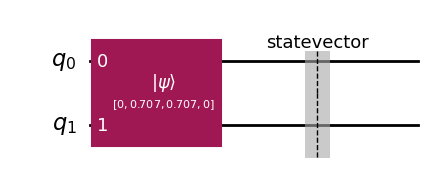

In [9]:
# Draw the circuit
qc.draw('mpl')
plt.show()

In [10]:
# Transpile the circuit for the AerSimulator
simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)

In [11]:
# Run the simulation to get the statevector
result = simulator.run(transpiled_circuit).result()

In [12]:
# Get the statevector from experiment data (modified)
statevector = result.data()['statevector']

In [13]:
# Visualize the statevector using latex (Qiskit 1.0)
print(array_to_latex(statevector))  # Print the latex representation

<IPython.core.display.Latex object>


In [14]:
# Measure all qubits
qc.measure_all()

In [15]:
# Transpile the circuit with measurement for the AerSimulator
transpiled_circuit_with_measurement = transpile(qc, simulator)
result_with_measurement = simulator.run(transpiled_circuit_with_measurement, shots=1024).result()

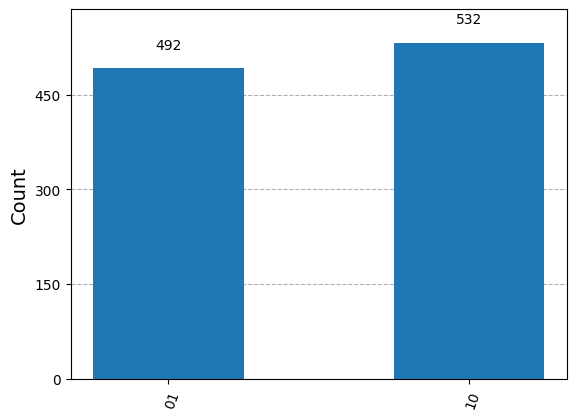

In [16]:
# Get the measurement results
counts = result_with_measurement.get_counts()
plot_histogram(counts)
plt.show()